## Describing a single set of Data 

One obvious description of any dataset is simply the data itself:

In [1]:

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

For a small enough dataset, this might even be the best description. But for a larger dataset, this is unwieldy and probably opaque.

### Histogram

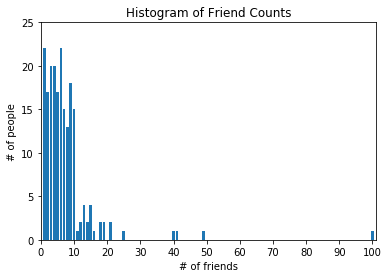

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

friend_counts = Counter(num_friends)
xs = range(101)                      # largest value is 100
ys = [friend_counts[x] for x in xs]  # height is just # of friends
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.xticks([i for i in range(0,101,10)])
plt.show()

In [3]:
num_points=len(num_friends)
print("No. of points: ",num_points)

No. of points:  204


In [4]:
largest_value=max(num_friends)
smallest_value=min(num_friends)
range=largest_value-smallest_value
print("Maximum no. of friends: ",largest_value)
print("Minimum no. of friends: ",smallest_value)
print("Range: ",range)

Maximum no. of friends:  100.0
Minimum no. of friends:  1
Range:  99.0


In [5]:
sorted_values=sorted(num_friends)
smallest_value=sorted_values[0]         # 1
largest_value=sorted_values[-1]         # 100
second_largest_value=sorted_values[-2]  # 49 

## Central Tendencies 
Usually we'll want some notion of where our data is centered.

### Mean 

In [6]:
from typing import List 

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

print("Mean: ",mean(num_friends))

Mean:  7.333333333333333


### Median

In [11]:
# The underscores indicate that these are "private" functions, as they're 
# intended to be called by our median function only.

def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint=len(xs) //2 # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint-1]+sorted_xs[hi_midpoint])/2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

print("Median: ",median(num_friends))


Median:  6.0


In [12]:
assert median([1,10,2,9,5]) == 5.0

In [13]:
assert median([1,9,2,10]) == (2+9)/2

### Quantiles

In [14]:
def quantile(xs: List[float], p: float) -> float: 
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [16]:
assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

### Mode 

In [18]:
def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts=Counter(x)
    max_count=max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

In [21]:
assert set(mode(num_friends)) == {1,6}

## Dispersion
Dispersion refers to measure of how spread out our data is.

### Range
The range is zero precisely when the max and min values are equal, which can only happen if the elements of x are all the same, which means the data is as undispersed as possible.
Like the median, the range doesn't depend on the whole dataset.

In [22]:
def data_range(xs: List[float]) -> float:
    return max(xs)-min(xs)

assert data_range(num_friends) == 99

### Variance 
When we're dealing with a sample from a larger population, x_bar is only an 'estimate' of the actual mean, which means that on average (x_i - x_bar) ** 2 is an underestimate of x_i's squared deviation from the mean, which is why we divide it by (n-1) instead of n.

In [28]:
Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"
    
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

def sum_of_squares(v: Vector) -> float: 
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v,v)

def de_mean(xs: List[float]) -> List[float]:
    """Translates xs by subtracting its mean (so the result has mean 0)"""
    x_bar=mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "Variance requires at least two elements"
    
    n=len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n-1) 

In [29]:
print("Variance: ",variance(num_friends))

Variance:  81.54351395730716


In [30]:
assert 81.54 < variance(num_friends) < 81.55

### Standard Deviation

In [31]:
import math 

def standard_deviation(xs: List[float]) -> float: 
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

In [33]:
print("Standard Deviation: ",standard_deviation(num_friends))

Standard Deviation:  9.03014473623248


Both Variance and Standard Deviation have the outlier problem.

### Interquartile range

In [34]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs,0.75) - quantile(xs,0.25)

In [35]:
print("Interquartile Range: ",interquartile_range(num_friends))

Interquartile Range:  6


## Covariance

In [37]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [38]:
daily_hours = [dm / 60 for dm in daily_minutes]

In [36]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    
    return dot(de_mean(xs),de_mean(ys)) / (len(xs) - 1)

In [40]:
print("Covariance: ",covariance(num_friends,daily_minutes))

Covariance:  22.425435139573064


## Correlation (lies between -1 and 1, inclusive)
Correlation is measuring the relationship between your two variables all else being equal.

In [41]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0: 
        return covariance(xs, ys) / stdev_x /stdev_y
    else: 
        return 0 # if no variation, correlation is zero 

In [42]:
print("Correlation: ",correlation(num_friends,daily_hours))

Correlation:  0.24736957366478196


In [43]:
print("Correlation: ",correlation(num_friends,daily_minutes))

Correlation:  0.24736957366478218


## Outliers

The person with 100 friends is a huge outlier.

Text(0, 0.5, 'minutes per day')

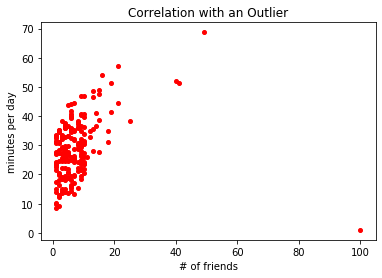

In [61]:
plt.plot(num_friends,daily_minutes,'ro',markersize=4)
plt.title("Correlation with an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")

What happens if we ignore him?

In [62]:
outlier = num_friends.index(100) # index of outlier

num_friends_good = [x 
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x 
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]


In [63]:
print("Correlation: ",correlation(num_friends_good, daily_hours_good)) # much stronger correlation

Correlation:  0.5736792115665579


Text(0, 0.5, 'minutes per day')

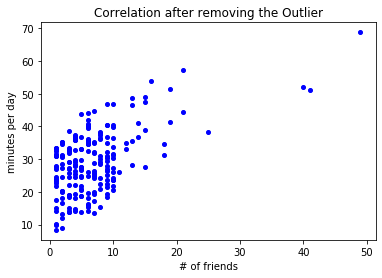

In [70]:
plt.plot(num_friends_good, daily_minutes_good,'bo',markersize = 4)
plt.title("Correlation after removing the Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")